In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Cars24.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,307299,2016,Hyderabad,Petrol,10674,Manual,2,6836
1,Hyundai,i10MAGNA 1.1 IRDE2,347599,2013,Hyderabad,Petrol,37003,Manual,3,7732
2,Maruti,AltoLXI,224499,2011,Hyderabad,Petrol,23837,Manual,1,4994
3,Maruti,AltoLXI,234799,2012,Hyderabad,Petrol,37800,Manual,1,5223
4,Maruti,Wagon R 1.0VXI,334999,2012,Hyderabad,Petrol,14631,Manual,1,7452


In [3]:
#Removing duplicated rows
df = df.drop_duplicates(keep='first')

In [4]:
df.isnull().sum().sort_values(ascending=False)

Gear             68
Model            68
EMI (monthly)     0
Ownership         0
Driven (Kms)      0
Fuel              0
Location          0
Model Year        0
Price             0
Car Brand         0
dtype: int64

In [5]:
columns = ['Model','Gear']
df = df.dropna(subset = columns).reset_index(drop=False)

In [6]:
df.isnull().sum()

index            0
Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

Since there no missing values we can start analyzing the data

In [7]:
df.columns

Index(['index', 'Car Brand', 'Model', 'Price', 'Model Year', 'Location',
       'Fuel', 'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          1677 non-null   int64 
 1   Car Brand      1677 non-null   object
 2   Model          1677 non-null   object
 3   Price          1677 non-null   int64 
 4   Model Year     1677 non-null   int64 
 5   Location       1677 non-null   object
 6   Fuel           1677 non-null   object
 7   Driven (Kms)   1677 non-null   int64 
 8   Gear           1677 non-null   object
 9   Ownership      1677 non-null   int64 
 10  EMI (monthly)  1677 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 144.2+ KB


In [9]:
df.index

RangeIndex(start=0, stop=1677, step=1)

In [10]:
df.describe(include='all')

,index,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
count,1677.000000,1677,1677,1.677000e+03,1677.000000,1677,1677,1677.000000,1677,1677.000000,1677.000000
unique,NaN,25,493,NaN,NaN,5,4,NaN,2,NaN,NaN
top,NaN,Maruti,Alto 800LXI,NaN,NaN,Delhi,Petrol,NaN,Manual,NaN,NaN
freq,NaN,813,66,NaN,NaN,1315,1021,NaN,1514,NaN,NaN
mean,867.657126,NaN,NaN,4.810775e+05,2014.805009,NaN,NaN,59298.168754,NaN,1.249851,10701.301729
std,507.860077,NaN,NaN,3.062266e+05,2.843915,NaN,NaN,39731.244607,NaN,0.498394,6811.856488
min,0.000000,NaN,NaN,6.600000e+04,2007.000000,NaN,NaN,199.000000,NaN,1.000000,1468.000000
25%,425.000000,NaN,NaN,3.019990e+05,2013.000000,NaN,NaN,30326.000000,NaN,1.000000,6718.000000
50%,862.000000,NaN,NaN,4.035990e+05,2015.000000,NaN,NaN,53962.000000,NaN,1.000000,8978.000000
75%,1308.000000,NaN,NaN,5.710000e+05,2017.000000,NaN,NaN,80910.000000,NaN,1.000000,12702.000000


Some statistical details can't be calculated for object type so it gives 'NaN' values

In [11]:
df = df.drop('index',axis=1)

# Analysing & Visualizing the Data


# 1) Total number of cars in different Cities



In [12]:
df.Location.unique()

array(['Hyderabad', 'Delhi', 'Mumbai', 'Bangalore', 'Chennai'],
      dtype=object)

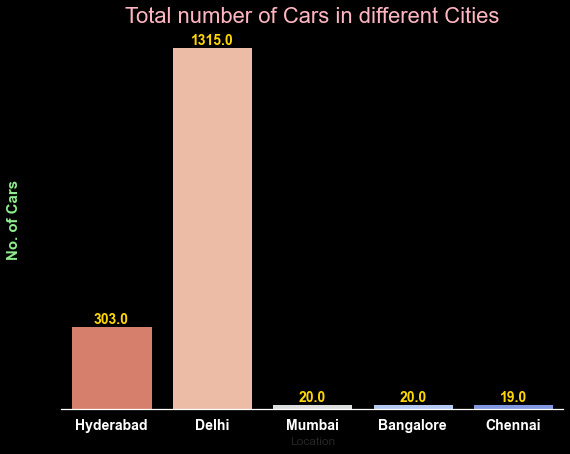

In [13]:
plt.figure(facecolor='black',figsize=(9,7))
sns.set(rc={'figure.figsize':(8,6)})
a = sns.countplot(x = 'Location',data=df,edgecolor='black',palette='coolwarm_r')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='gold',fontweight='bold')
plt.title("Total number of Cars in different Cities",fontsize=22,color='lightpink')
plt.xticks(rotation=0,fontsize=14,fontweight='bold',color='white')
plt.yticks(fontsize=12,fontweight='bold',color='black')
a.set_facecolor('black')
a.set_ylabel("No. of Cars", fontsize =15, color='lightgreen',fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('white')
a.spines['right'].set_color('black')
plt.grid(False)

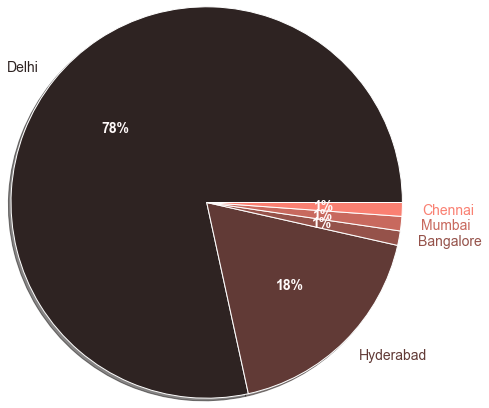

In [14]:
#2) Percentage of cars available for sale in different cities

count = df['Location'].value_counts()
count = count.reset_index().rename(columns={'Location':'Count','index':'Location'})
colors = sns.set_palette('dark:salmon',5)
patches,text, pcts= plt.pie(x='Count',labels='Location',autopct='%1.0f%%',data=count,colors=colors,radius=1.5,shadow=True,
                    textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()

In [15]:
#3) No. of different Brands in all Cities

brand_count = df['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns = {'index':'Brand','Car Brand':'Count'})

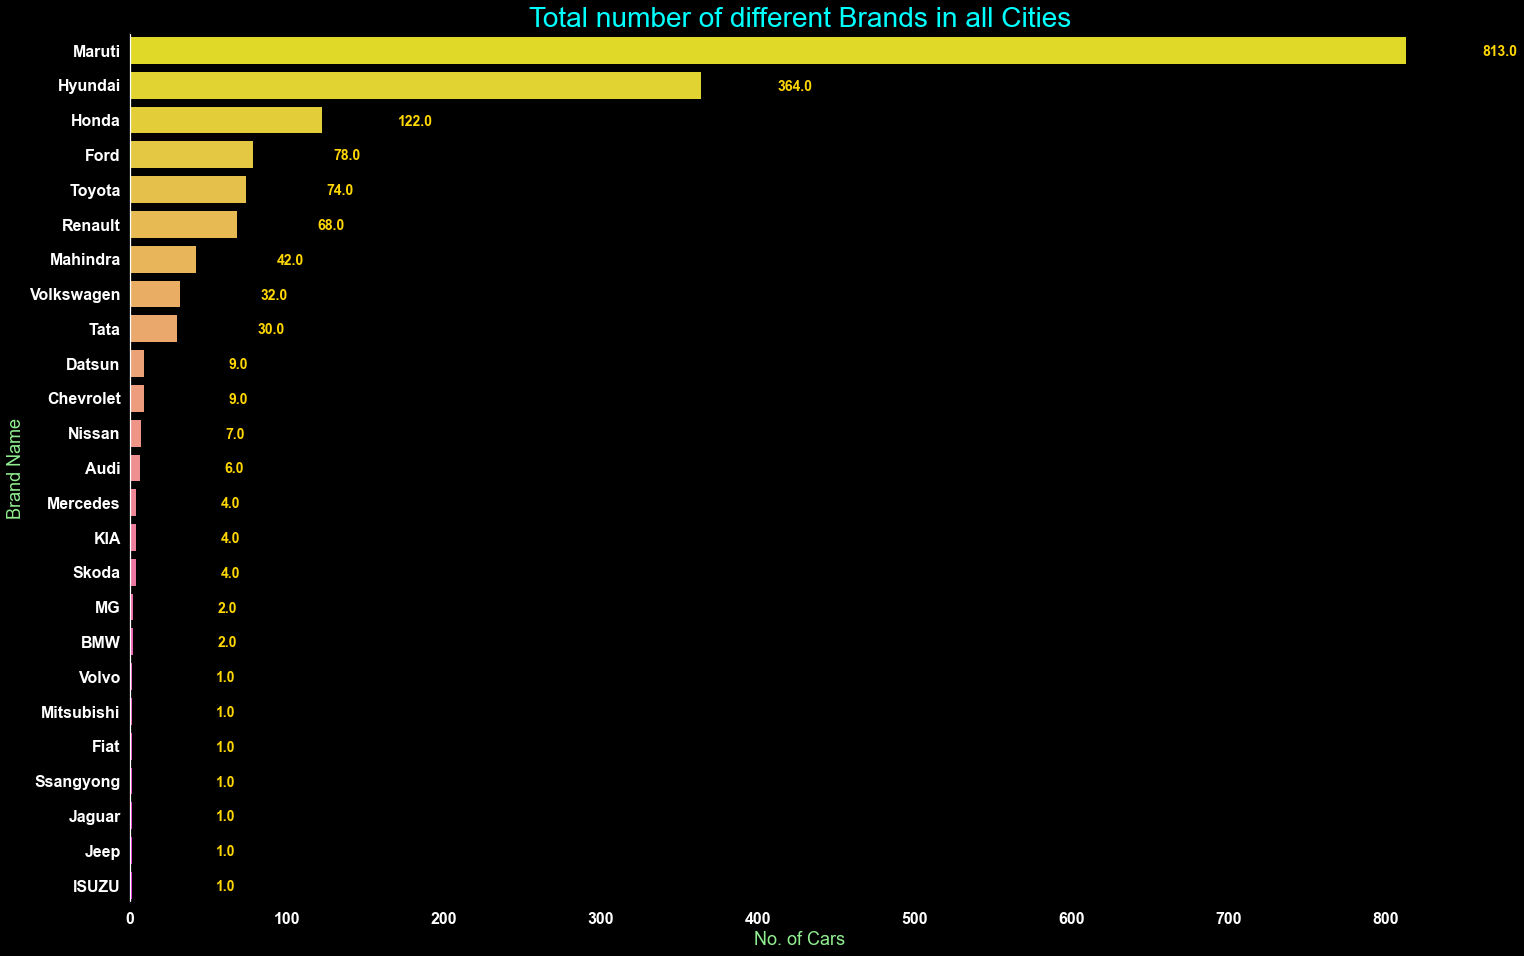

In [16]:
plt.figure(facecolor='black',figsize=(24,16))
sns.set(rc={'figure.figsize':(22,14)})
a = sns.barplot(y ='Brand',x='Count',data=brand_count,palette='spring_r',edgecolor='black')
plt.xticks(rotation=0,fontsize=16,fontweight='bold',color='white')
plt.yticks(fontsize=16,fontweight='bold',color='white')
for p in a.patches:
    width = p.get_width()
    plt.text(60+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=14,color='gold',fontweight='bold')
a.set_xlabel("No. of Cars", fontsize = 18,color='lightgreen')
a.set_ylabel("Brand Name", fontsize =18, color='lightgreen')
plt.title("Total number of different Brands in all Cities",fontsize=28,color='cyan')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

In [17]:
#4) Average Price of all the brands

avg_price = df.groupby(by=['Car Brand'])['Price'].mean().sort_values(ascending=False).reset_index().rename(
    columns={'Price':'Avg Price'})
avg_price['Avg Price'] = avg_price['Avg Price'].astype(int)

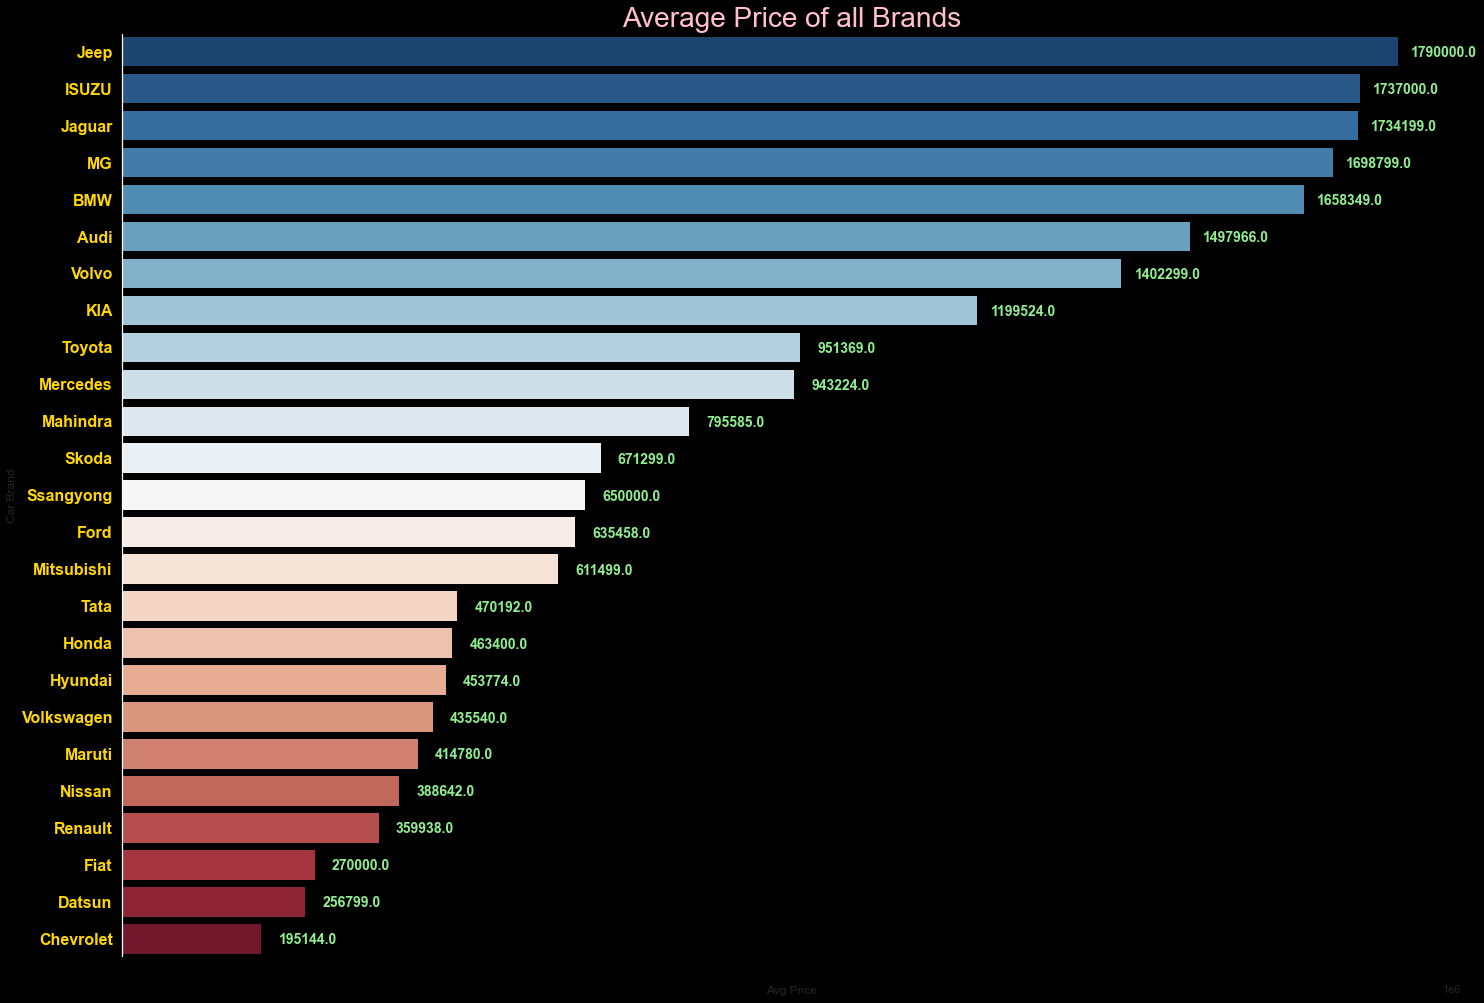

In [18]:
plt.figure(facecolor='black',figsize=(24,17))
sns.set(rc={'figure.figsize':(22,16)})
a = sns.barplot(y ='Car Brand',x='Avg Price',data=avg_price,palette='RdBu_r',edgecolor='none')
plt.xticks(rotation=0,fontsize=16,fontweight='bold',color='black')
plt.yticks(fontsize=16,fontweight='bold',color='gold')
for p in a.patches:
    width = p.get_width()
    plt.text(65000+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=14,fontweight='bold',color='lightgreen')
plt.title("Average Price of all Brands",fontsize=28,color='pink')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

In [19]:
#5) Total no. of different Car Brands in Hyderabad

hyd_city = df.loc[(df['Location'] == 'Hyderabad')]
hyd_brands = hyd_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

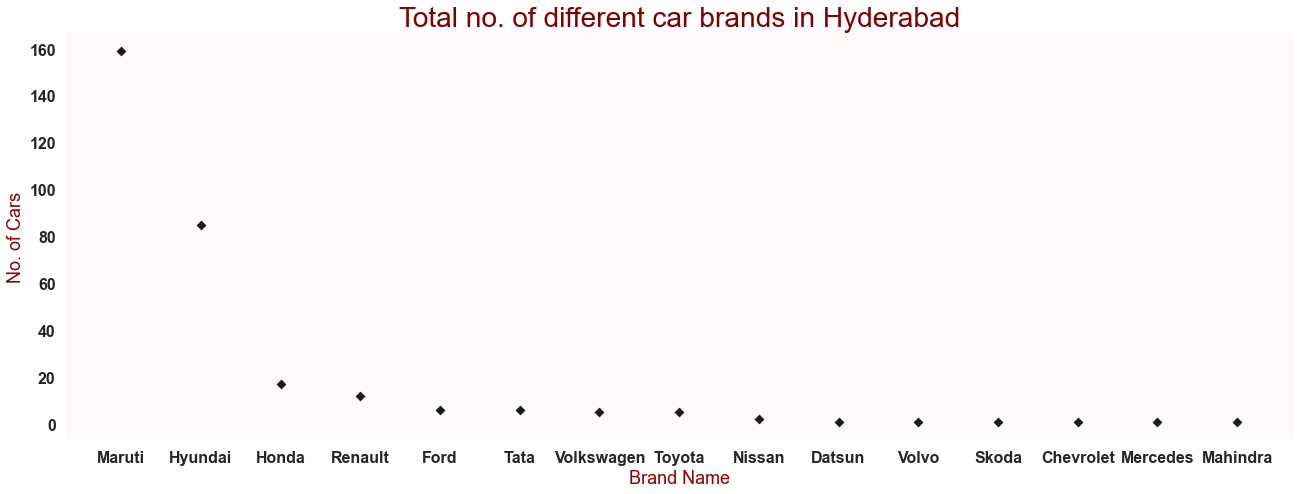

In [20]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('snow')
plt.scatter('Brand','Count',data=hyd_brands,color='k',marker='D')
plt.xticks(rotation=0,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Hyderabad",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

In [21]:
#6) Total no. of different Car Brands in Delhi
delhi_city = df.loc[(df['Location'] == 'Delhi')]
delhi_brands = delhi_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

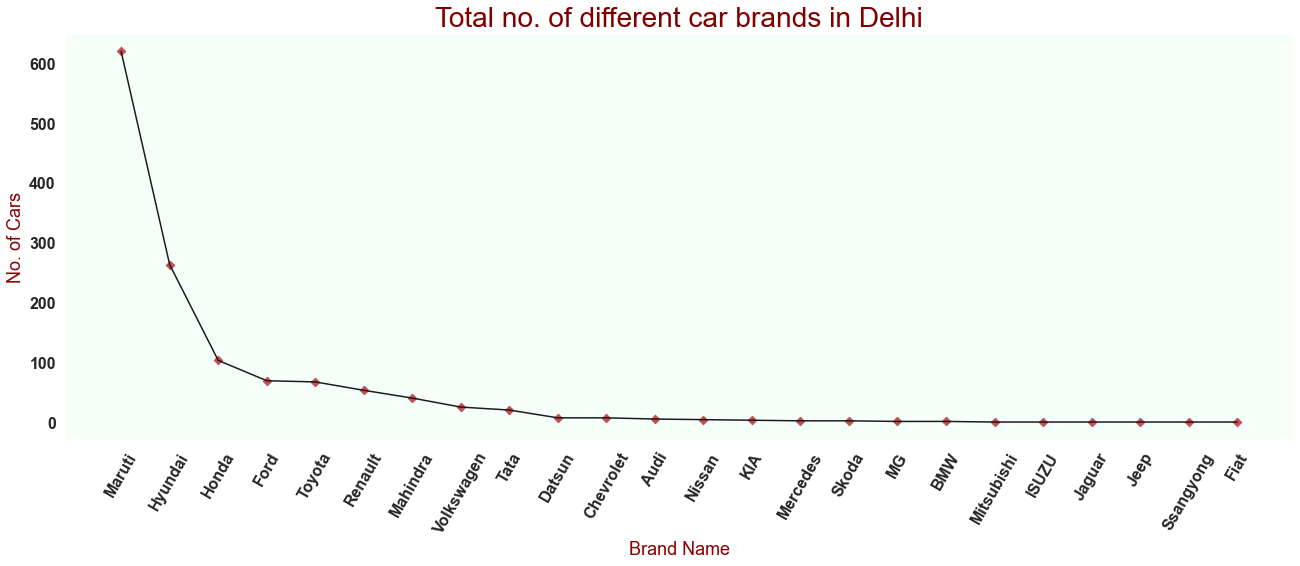

In [22]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=delhi_brands,color='k')
plt.scatter('Brand','Count',data=delhi_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Delhi",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

In [23]:
#7) Total no. of different Car Brands in Mumbai

mumbai_city = df.loc[(df['Location'] == 'Mumbai')]
mumbai_brands = mumbai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

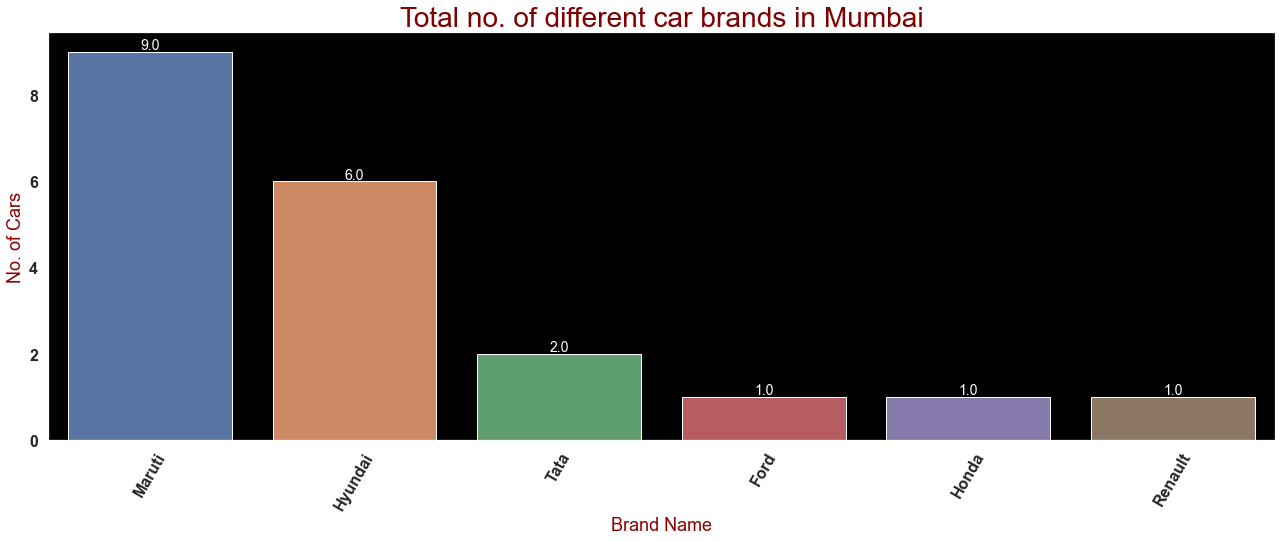

In [24]:
sns.set(rc={'figure.figsize':(22,7.5)})
a = sns.barplot(x ='Brand',y='Count',data=mumbai_brands)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='white')
a.set_xlabel("Brand Name", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("Total no. of different car brands in Mumbai",fontsize=28,color='maroon')
a.set_facecolor('black')
plt.grid(False)

In [25]:
#8) Total no. of different Car Brands in Bangalore

bangalore_city = df.loc[(df['Location'] == 'Bangalore')]
bangalore_brands = bangalore_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

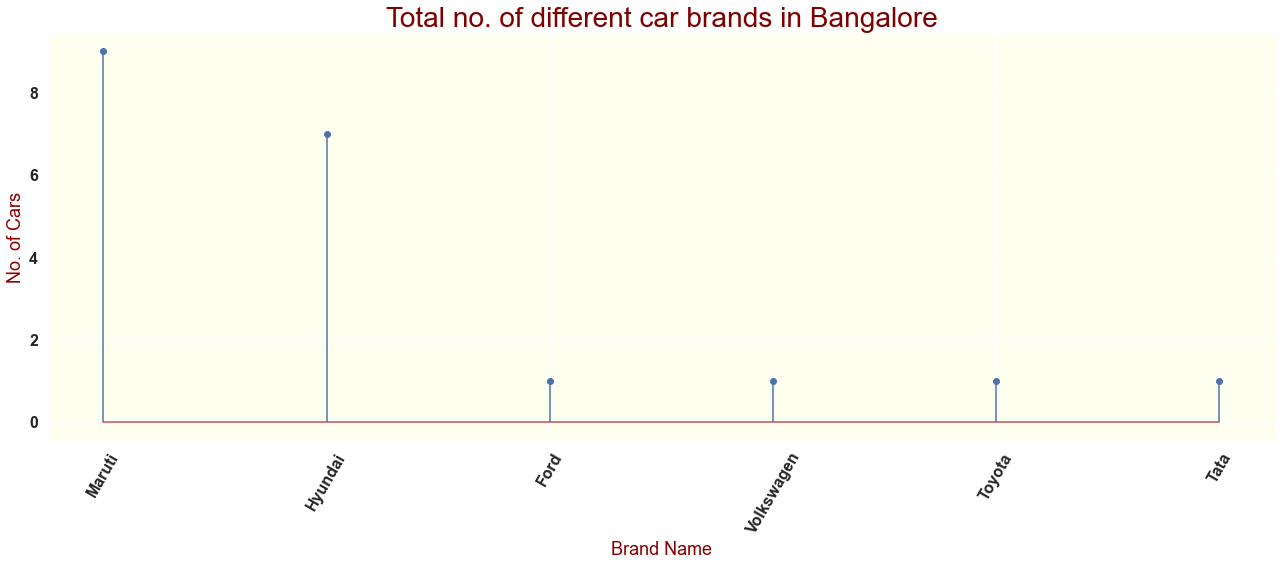

In [26]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('ivory')
plt.stem('Brand','Count',data=bangalore_brands)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.title("Total no. of different car brands in Bangalore",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.show()

In [27]:
#9) Total no. of different Car Brands in Chennai

chennai_city = df.loc[(df['Location'] == 'Chennai')]
chennai_brands = chennai_city['Car Brand'].value_counts().sort_values(ascending = True).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

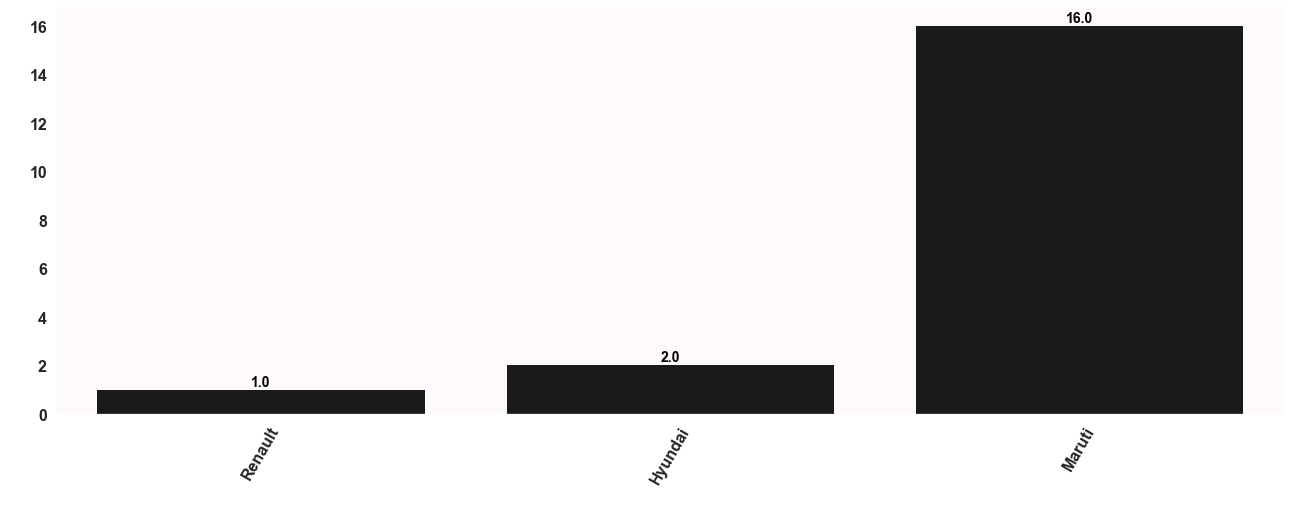

In [28]:
sns.set(rc={'figure.figsize':(22,7.5)})
a = sns.barplot(x ='Brand',y='Count',data=chennai_brands,hatch=('*'),color='k',edgecolor='none')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,8),textcoords='offset points',fontsize=14,color='black',fontweight='bold')
a.set_xlabel("Brand Name", fontsize = 18,color='white')
a.set_ylabel("No. of Cars", fontsize =18, color='white')
#plt.title("Total no. of different car brands in Chennai",fontsize=28,color='maroon')
a.set_facecolor('snow')
plt.grid(False)

In [29]:
#10) Number of Cars based on Fuel type in all cities

fuel_gear = df.groupby(by=['Fuel'])['Location'].count().sort_values(ascending=True).reset_index().rename(
    columns={'Location':'Count'})
fuel_gear

,Fuel,Count
0,Petrol + LPG,4
1,Petrol + CNG,20
2,Diesel,632
3,Petrol,1021


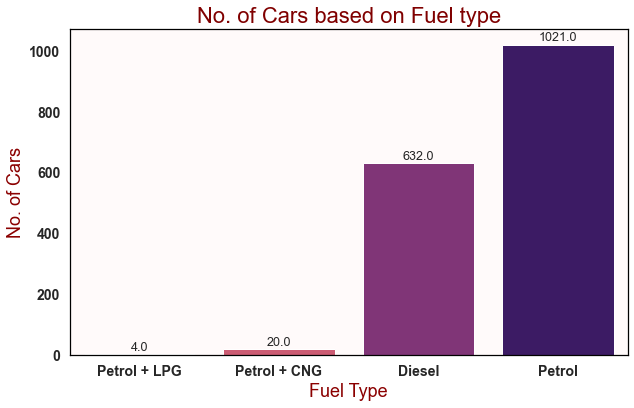

In [30]:
sns.set(rc={'figure.figsize':(10,6)})
a = sns.barplot(x ='Fuel',y='Count',data=fuel_gear,palette='magma_r')
plt.xticks(rotation=0,fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=12.6)
a.set_xlabel("Fuel Type", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("No. of Cars based on Fuel type",fontsize=22,color='maroon')
a.set_facecolor('snow')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

In [31]:
#11) No. of Cars based on Fuel type in different Cities

fuel_location = df.groupby(by=['Location','Fuel'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count','Count':'Fuel'})
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)
fuel_location

,Location,Fuel,Count
0,Bangalore,Petrol,20
1,Chennai,Petrol,19
2,Delhi,Petrol + CNG,19
3,Delhi,Diesel,560
4,Delhi,Petrol,736
5,Hyderabad,Petrol + CNG,1
6,Hyderabad,Petrol + LPG,4
7,Hyderabad,Diesel,71
8,Hyderabad,Petrol,227
9,Mumbai,Diesel,1


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


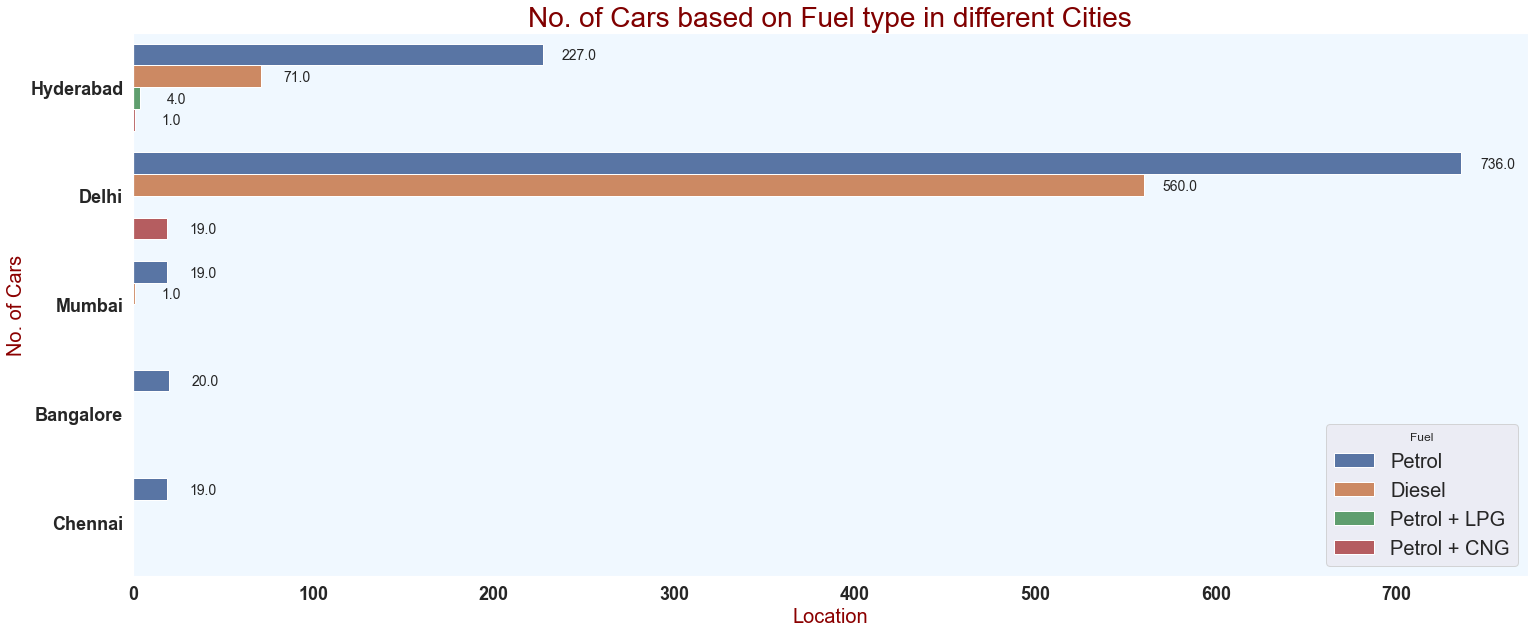

In [32]:
sns.set(rc={'figure.figsize':(25,10)})
a = sns.countplot(y = 'Location',hue='Fuel',data=df)
plt.xticks(rotation=0,fontsize=18,fontweight='bold')
plt.yticks(fontsize=18,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(20+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14)
a.set_xlabel("Location", fontsize = 20,color='darkred')
a.set_ylabel("No. of Cars", fontsize =20, color='darkred')
plt.title("No. of Cars based on Fuel type in different Cities",fontsize=28,color='maroon')
a.set_facecolor('aliceblue')
plt.legend(loc='lower right',title='Fuel',prop={'size': 20})
a.grid(False)

In [33]:
#12) No. of cars in different Cities based on Model Year

fuel_location = df.groupby(by=['Location','Model Year'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count','Count':'Model Year'})
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

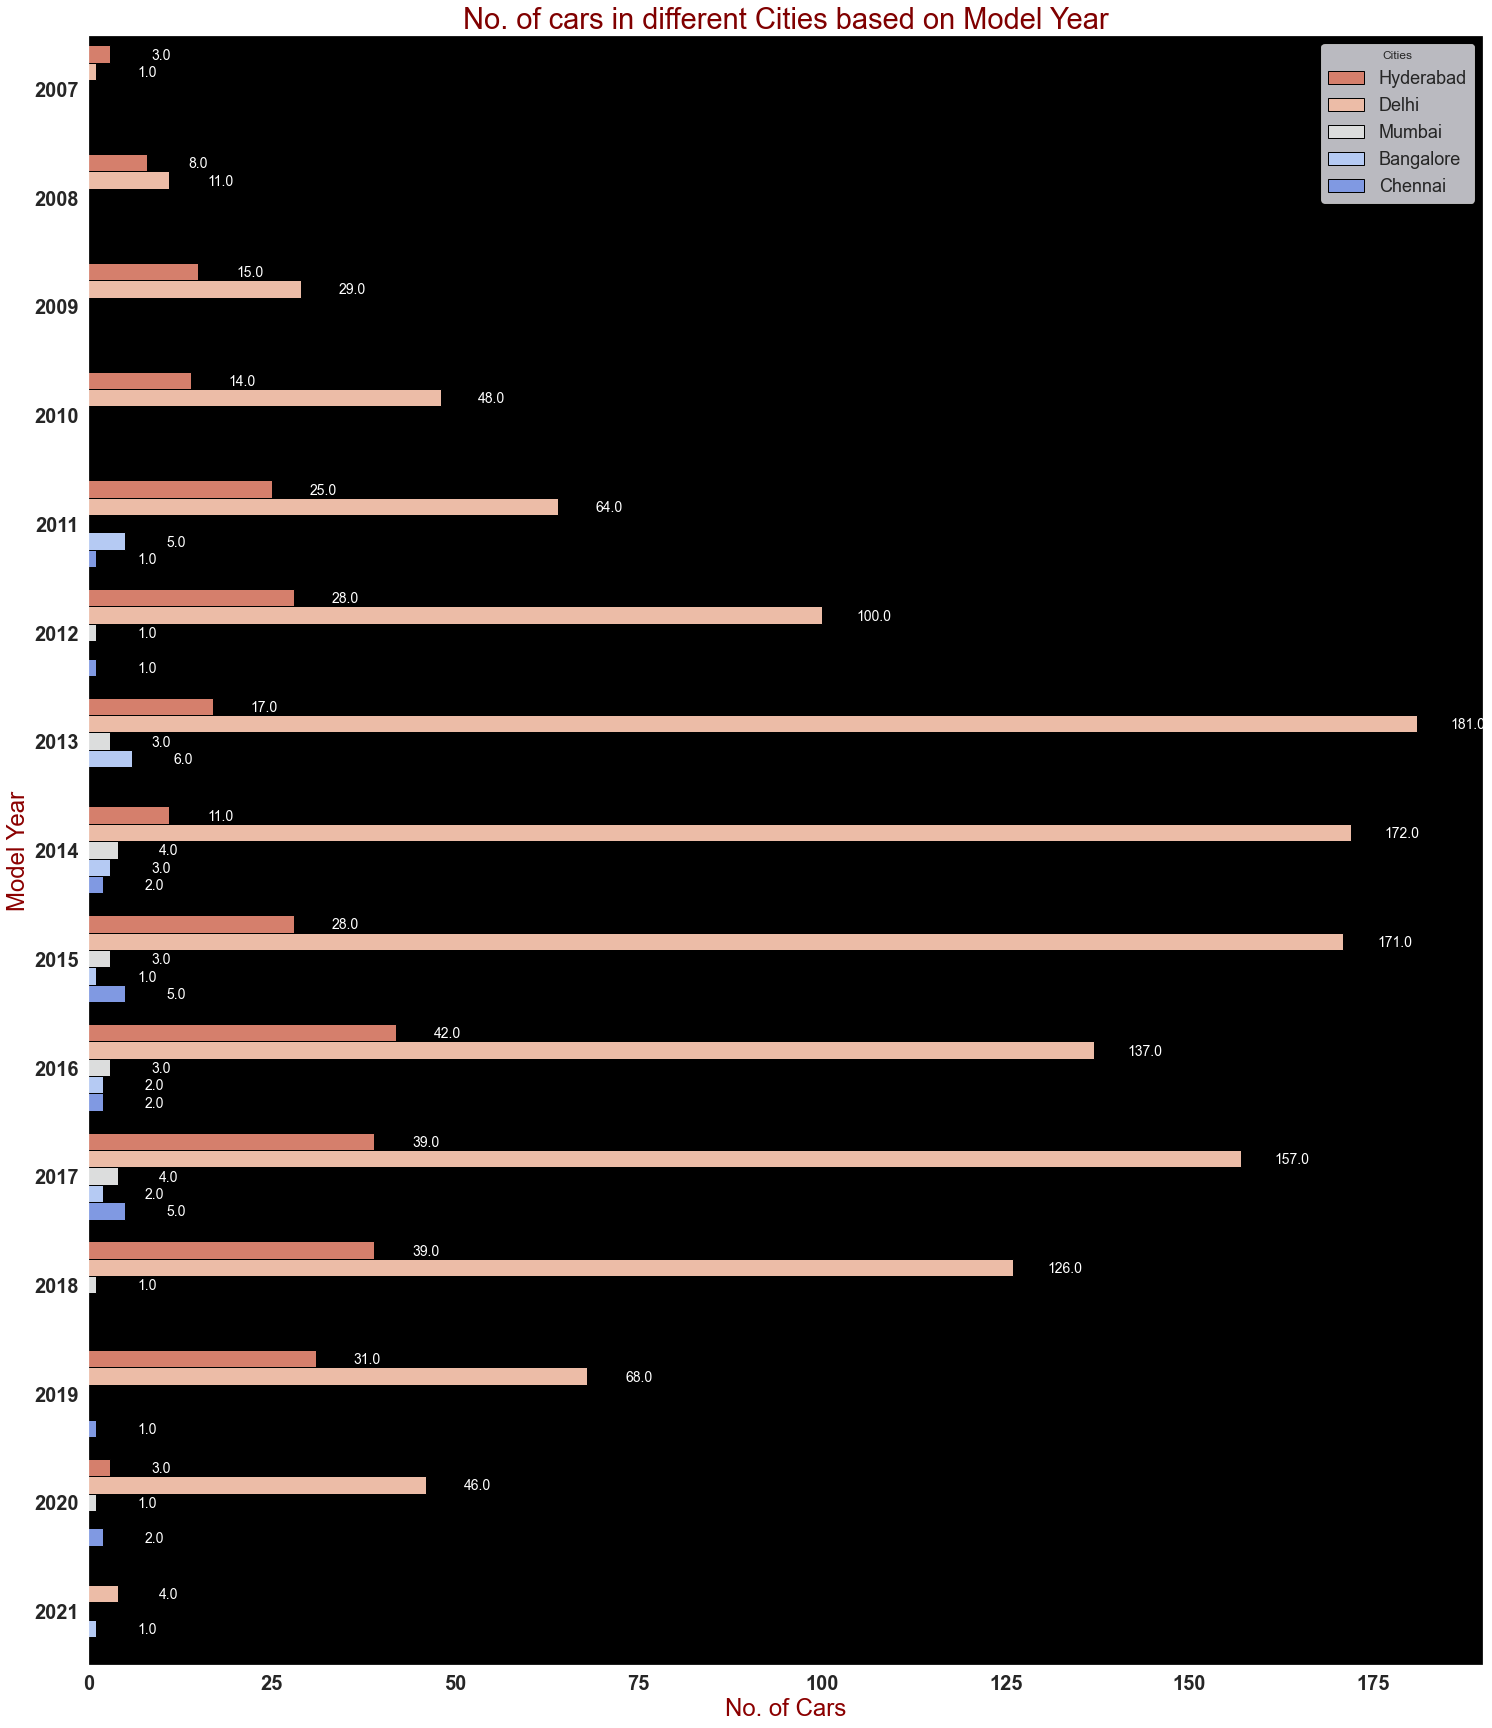

In [34]:
sns.set(rc={'figure.figsize':(25,30)})
a = sns.countplot(y = 'Model Year',hue='Location',data=df,edgecolor='black',palette='coolwarm_r')
plt.xticks(rotation=0,fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(7+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14,
            color='white')
a.set_ylabel("Model Year", fontsize = 24,color='darkred')
a.set_xlabel("No. of Cars", fontsize =24, color='darkred')
plt.title("No. of cars in different Cities based on Model Year",fontsize=29,color='maroon')
a.set_facecolor('black')
plt.legend(loc='upper right',title='Cities',prop={'size': 18})
a.grid(False)

In [35]:
#13) No. of Cars in different cities based on Gear

location_gear = df.groupby(by=['Location','Gear'])['Ownership'].count().reset_index().rename(
    columns={'Ownership':'Count'})
location_gear

,Location,Gear,Count
0,Bangalore,Automatic,1
1,Bangalore,Manual,19
2,Chennai,Automatic,1
3,Chennai,Manual,18
4,Delhi,Automatic,115
5,Delhi,Manual,1200
6,Hyderabad,Automatic,42
7,Hyderabad,Manual,261
8,Mumbai,Automatic,4
9,Mumbai,Manual,16


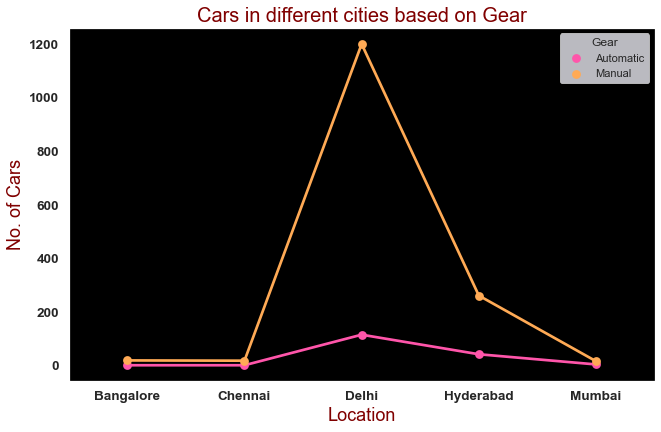

In [36]:
sns.set(rc={'figure.figsize':(10.5,6.5)})
plt.xticks(rotation=0,fontsize=13.5,fontweight='bold')
plt.yticks(fontsize=13.5,fontweight='bold')
a = sns.pointplot(x='Location',y='Count',hue='Gear',data=location_gear,palette='spring')
a.set_facecolor('black')
a.set_xlabel("Location", fontsize = 18,color='maroon')
a.set_ylabel("No. of Cars", fontsize =18, color='maroon')
plt.title("Cars in different cities based on Gear",fontsize=20,color='maroon')
plt.grid(False)

In [37]:
#14) No. of Cars in different cities based on Ownership

location_owner = df.groupby(by=['Location','Ownership'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count'})
location_owner

,Location,Ownership,Count
0,Bangalore,1,14
1,Bangalore,2,5
2,Bangalore,3,1
3,Chennai,1,16
4,Chennai,2,2
5,Chennai,3,1
6,Delhi,1,1061
7,Delhi,2,219
8,Delhi,3,31
9,Delhi,4,4


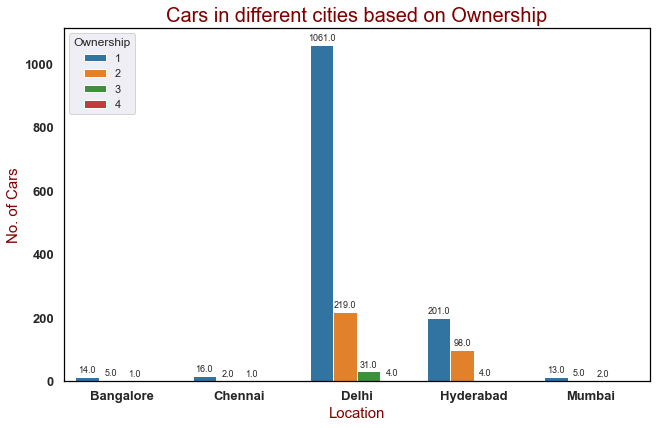

In [38]:
sns.set(rc={'figure.figsize':(10.5,6.5)})
a = sns.barplot(x='Location',y='Count',data=location_owner,hue='Ownership',palette='tab10')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=9)
a.set_facecolor('white')
a.set_xlabel("Location", fontsize = 15,color='maroon')
a.set_ylabel("No. of Cars", fontsize =15, color='maroon')
plt.title("Cars in different cities based on Ownership",fontsize=20,color='maroon')
plt.xticks(rotation=0,fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
a.grid(False)

In [39]:
df['Car Brand'].unique()

array(['Hyundai', 'Maruti', 'Honda', 'Tata', 'Datsun', 'Renault',
       'Toyota', 'Volvo', 'Volkswagen', 'Chevrolet', 'Ford', 'Skoda',
       'Mahindra', 'Nissan', 'Mercedes', 'KIA', 'MG', 'ISUZU', 'Jeep',
       'Audi', 'BMW', 'Fiat', 'Ssangyong', 'Jaguar', 'Mitsubishi'],
      dtype=object)

In [40]:
#15) Average Price, EMI, Driven(Kms) based on Fuel type in Bangalore

models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
bangalore = models[models['Location']=='Bangalore']
bangalore

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
0,Bangalore,Petrol,410114,2013,21221,1,9122


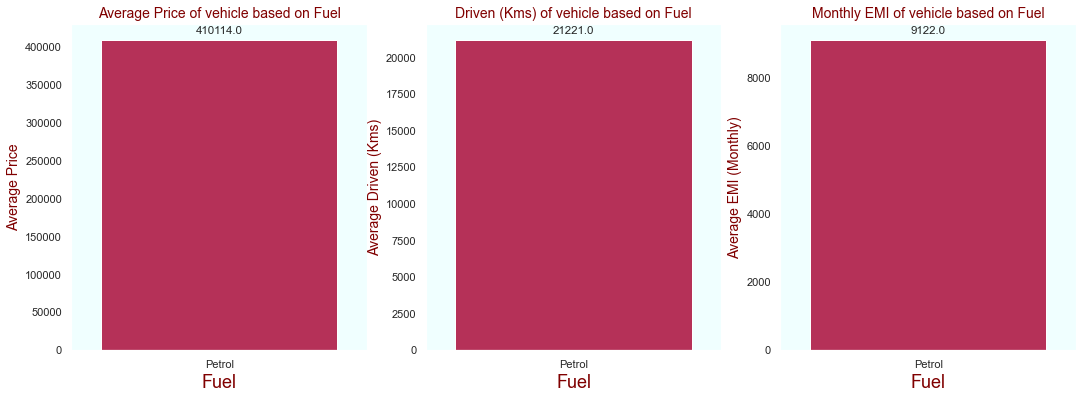

In [41]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=bangalore,palette='rocket',ax =axes[0])
a.set_facecolor('azure')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=bangalore,palette='rocket',ax =axes[1])
b.set_facecolor('azure')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=bangalore,palette='rocket',ax =axes[2])
c.set_facecolor('azure')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
a.grid(False)
b.grid(False)
c.grid(False)

In [42]:
#16) Average Price, EMI, Driven(Kms) based on Fuel type in Chennai

models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
chennai = models[models['Location']=='Chennai']
chennai

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
1,Chennai,Petrol,370935,2015,17778,1,8251


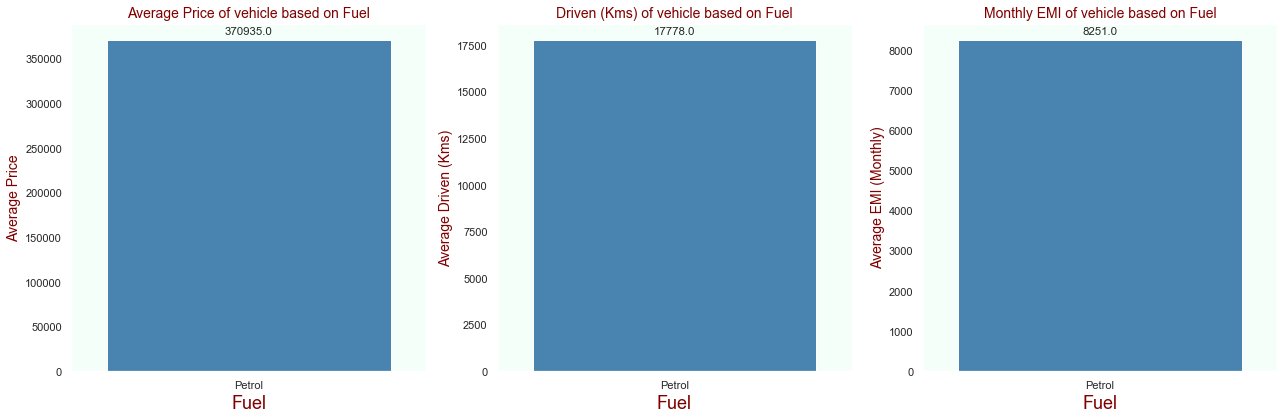

In [43]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=chennai,palette='Blues_d',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=chennai,palette='Blues_d',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=chennai,palette='Blues_d',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

In [44]:
#17) Average Price, EMI, Driven(Kms) based on Fuel type in Delhi

models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
delhi = models[models['Location']=='Delhi']
delhi

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
2,Delhi,Diesel,588631,2014,79434,1,13093
3,Delhi,Petrol,416235,2014,45093,1,9258
4,Delhi,Petrol + CNG,307523,2013,45410,1,6840


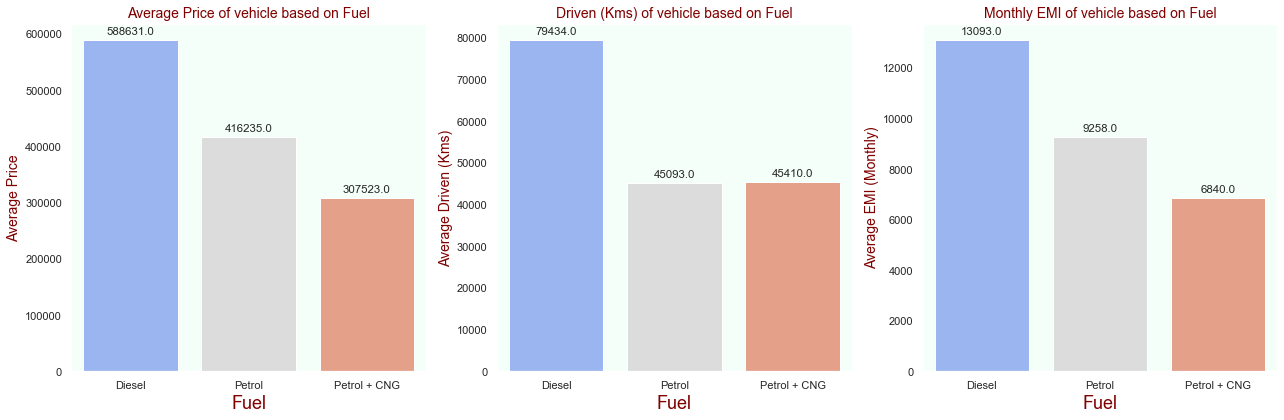

In [45]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=delhi,palette='coolwarm',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=delhi,palette='coolwarm',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=delhi,palette='coolwarm',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

In [46]:
#18) Average Price, EMI, Driven(Kms) based on Fuel type in Hyderabad

models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
hyderabad = models[models['Location']=='Hyderabad']
hyderabad

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
5,Hyderabad,Diesel,695420,2015,90270,1,15469
6,Hyderabad,Petrol,401616,2014,56078,1,8933
7,Hyderabad,Petrol + CNG,329299,2013,60935,1,7325
8,Hyderabad,Petrol + LPG,181249,2008,122863,1,4031


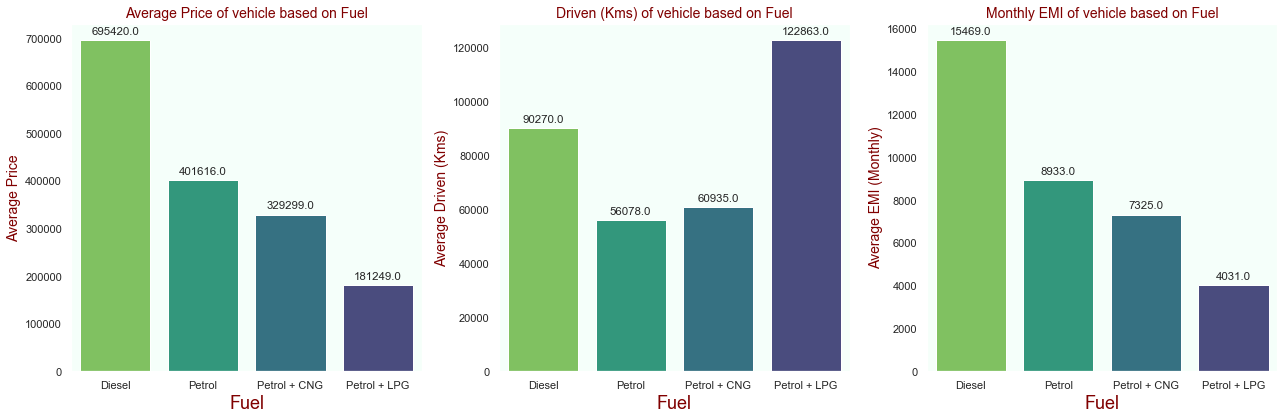

In [47]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=hyderabad,palette='viridis_r',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=hyderabad,palette='viridis_r',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=hyderabad,palette='viridis_r',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

In [48]:
#19) Average Price, EMI, Driven(Kms) based on Fuel type in Mumbai

models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
mumbai = models[models['Location']=='Mumbai']
mumbai

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
9,Mumbai,Diesel,401899,2012,30736,1,8940
10,Mumbai,Petrol,404920,2015,22277,1,9007


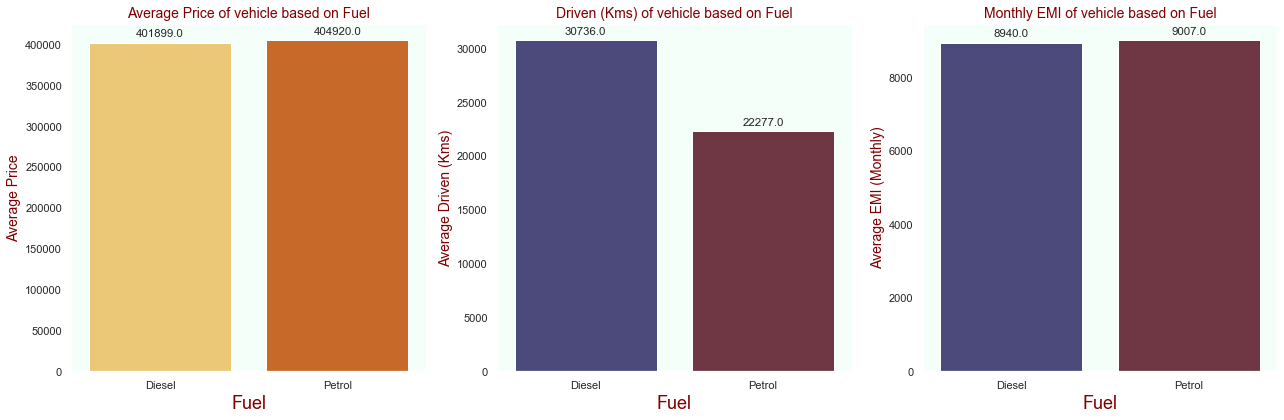

In [49]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=mumbai,palette='YlOrBr',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=mumbai,palette='icefire',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=mumbai,palette='icefire',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

In [50]:
#20) Car with highest & lowest price in Hyderabad

by_model = df.groupby(by=['Location','Car Brand','Model']).median()
by_model = by_model.reset_index()
model_h = by_model[by_model["Location"]=='Hyderabad'].sort_values('Price',ascending=False)

In [51]:
def max_min(column):
    high = model_h[column].idxmax()
    high_model = pd.DataFrame(model_h.loc[high])
    low = model_h[column].idxmin()
    low_model = pd.DataFrame(model_h.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,598,526
Location,Hyderabad,Hyderabad
Car Brand,Toyota,Maruti
Model,Innova Crysta2.8 ZX AT 7 STR,A StarLXI
Price,1.7379e+06,171599
Model Year,2017,2009
Driven (Kms),71780,121811
Ownership,2,2
EMI (monthly),38659,3817


In [52]:
#21) Car with highest & lowest price in Delhi

model_d = by_model[by_model["Location"]=='Delhi'].sort_values('Price',ascending=False)

In [53]:
def max_min(column):
    high = model_d[column].idxmax()
    high_model = pd.DataFrame(model_d.loc[high])
    low = model_d[column].idxmin()
    low_model = pd.DataFrame(model_d.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,62,406
Location,Delhi,Delhi
Car Brand,Ford,Tata
Model,Endeavour2.2L AT Titanium Plus Sunroof,NanoLX
Price,2.999e+06,66000
Model Year,2019,2013
Driven (Kms),29217,51392
Ownership,1,1
EMI (monthly),66711,1468


In [54]:
#22) Car with highest & lowest price in Mumbai

model_m = by_model[by_model["Location"]=='Mumbai'].sort_values('Price',ascending=False)

In [55]:
def max_min(column):
    high = model_m[column].idxmax()
    high_model = pd.DataFrame(model_m.loc[high])
    low = model_m[column].idxmin()
    low_model = pd.DataFrame(model_m.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,620,605
Location,Mumbai,Mumbai
Car Brand,Tata,Ford
Model,NEXONXM 1.2,Figo1.2 ZXI DURATEC
Price,810499,204099
Model Year,2020,2014
Driven (Kms),1845,35703
Ownership,1,3
EMI (monthly),18029,4540


In [56]:
#23) Car with highest & lowest price in Bangalore

model_b = by_model[by_model["Location"]=='Bangalore'].sort_values('Price',ascending=False)

In [57]:
def max_min(column):
    high = model_b[column].idxmax()
    high_model = pd.DataFrame(model_b.loc[high])
    low = model_b[column].idxmin()
    low_model = pd.DataFrame(model_b.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,0,1
Location,Bangalore,Bangalore
Car Brand,Ford,Hyundai
Model,New Figo1.2 TITANIUM,EonD LITE PLUS
Price,675199,297599
Model Year,2021,2015
Driven (Kms),335,8895
Ownership,1,1
EMI (monthly),15019,6620


In [58]:
#24) Car with highest & lowest price in Chennai

model_c = by_model[by_model["Location"]=='Chennai'].sort_values('Price',ascending=False)

In [59]:
def max_min(column):
    high = model_c[column].idxmax()
    high_model = pd.DataFrame(model_c.loc[high])
    low = model_c[column].idxmin()
    low_model = pd.DataFrame(model_c.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,26,20
Location,Chennai,Chennai
Car Brand,Maruti,Maruti
Model,SwiftVXI,Alto K10LXI
Price,642599,221099
Model Year,2019,2011
Driven (Kms),6240,42789
Ownership,1,2
EMI (monthly),14294,4918


In [60]:
#25) High budget & Low budger car among all cities

price = df.sort_values(by='Price',ascending=False)



In [61]:
def max_min(column):
    high = price[column].idxmax()
    high_model = pd.DataFrame(price.loc[high])
    low = price[column].idxmin()
    low_model = pd.DataFrame(price.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,983,1465
Car Brand,Ford,Tata
Model,Endeavour2.2L AT Titanium Plus Sunroof,NanoLX
Price,2999000,66000
Model Year,2019,2013
Location,Delhi,Delhi
Fuel,Diesel,Petrol
Driven (Kms),29217,51392
Gear,Automatic,Manual
Ownership,1,1
EMI (monthly),66711,1468


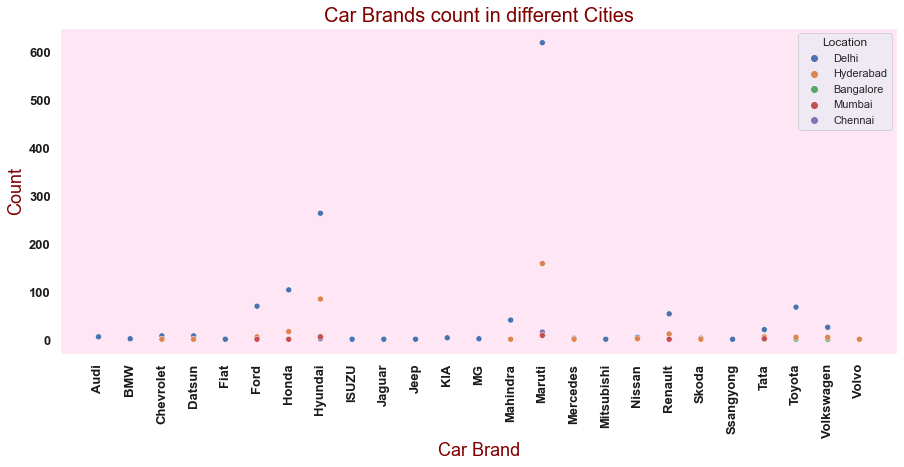

In [62]:
#26) Comparision of car brand count in different Cities

by_model = df.groupby(by=['Car Brand','Location'])['Price'].count().reset_index().rename(
    columns={'Price':'Count'})
sns.set(rc={'figure.figsize':(15,6)})
a = sns.scatterplot(y='Count',x='Car Brand',hue='Location',data=by_model)

a.set_ylabel("Count", fontsize = 18,color='maroon')
a.set_xlabel("Car Brand", fontsize =18, color='maroon')
a.set_title("Car Brands count in different Cities", fontsize =20, color='maroon')
a.set_facecolor('#FFE6F5')
plt.xticks(rotation = 90,fontsize=13,color='k',fontweight='bold')
plt.yticks(fontsize=13,color='k',fontweight='bold')
a.grid(False)
plt.show()

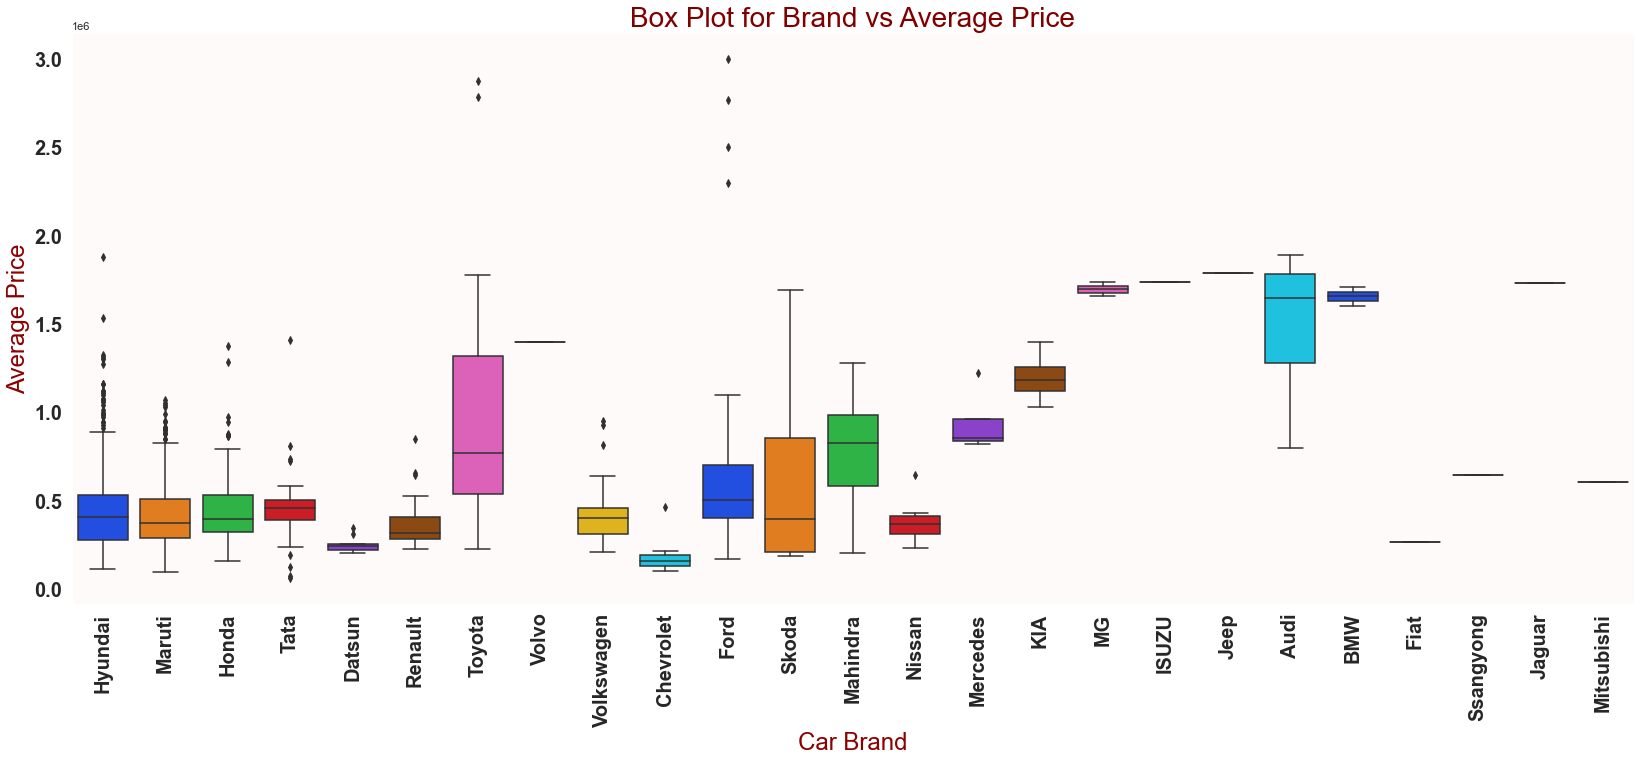

In [63]:
#27) Car Brand vs Average Price

sns.set(rc={'figure.figsize':(28,10.5)})
a = sns.boxplot(x='Car Brand',y='Price',data=df,palette='bright')
a.set_xlabel("Car Brand", fontsize = 24,color='darkred')
a.set_ylabel("Average Price", fontsize =24, color='darkred')
plt.xticks(rotation=90,fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
a.set_title("Box Plot for Brand vs Average Price", fontsize =28, color='maroon')
a.set_facecolor('snow')
a.grid(False)
plt.show()

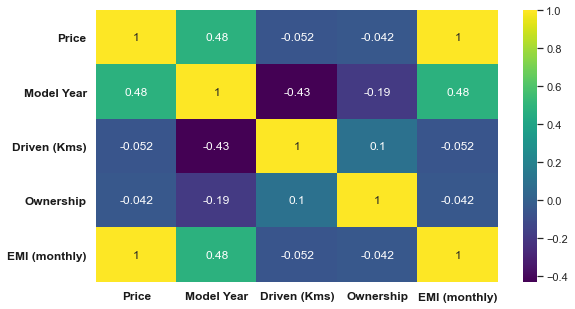

In [64]:
#28) Heat Map for Correlation

sns.set(rc={'figure.figsize':(9,5)})
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 1305 to 1126
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car Brand     1173 non-null   object
 1   Model         1173 non-null   object
 2   Price         1173 non-null   int64 
 3   Model Year    1173 non-null   int64 
 4   Location      1173 non-null   object
 5   Fuel          1173 non-null   object
 6   Driven (Kms)  1173 non-null   int64 
 7   Gear          1173 non-null   object
 8   Ownership     1173 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 91.6+ KB


In [72]:
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,307299,2016,Hyderabad,Petrol,10674,Manual,2,6836
1,Hyundai,i10MAGNA 1.1 IRDE2,347599,2013,Hyderabad,Petrol,37003,Manual,3,7732
2,Maruti,AltoLXI,224499,2011,Hyderabad,Petrol,23837,Manual,1,4994
3,Maruti,AltoLXI,234799,2012,Hyderabad,Petrol,37800,Manual,1,5223
4,Maruti,Wagon R 1.0VXI,334999,2012,Hyderabad,Petrol,14631,Manual,1,7452


In [ ]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

The Random Forest model performed the best with a R2 score of 0.88.